Load MNIST Dataset

In [29]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [30]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Random Forest

In [31]:
from sklearn.model_selection import train_test_split

X, y = mnist.data, mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

Check accuracy

In [33]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9672857142857143
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [35]:
cm_errors = cm.copy()
np.fill_diagonal(cm_errors, 0)

In [36]:
row_sums = cm_errors.sum(axis=1, keepdims=True)
cm_error_normalized = np.divide(
    cm_errors,
    row_sums,
    where=row_sums != 0
)

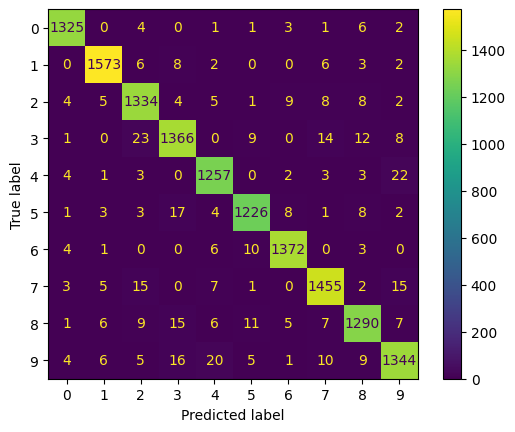

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

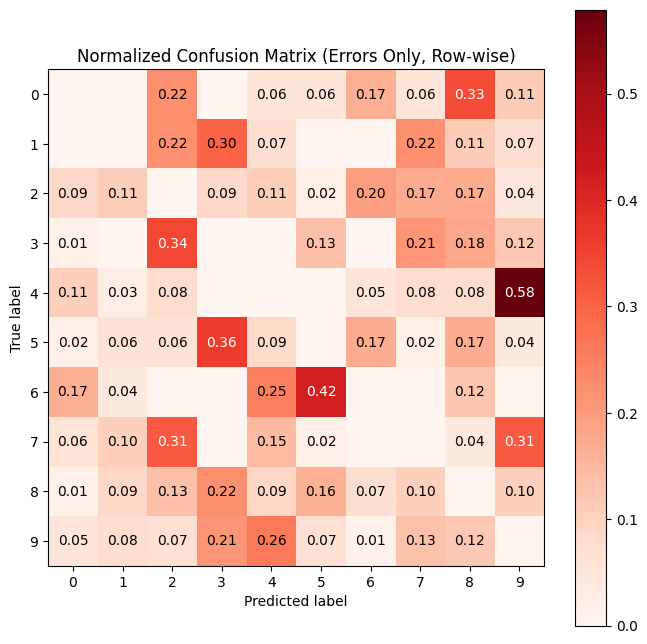

In [38]:
plt.figure(figsize=(8, 8))
plt.imshow(cm_error_normalized, cmap="Reds")
plt.colorbar()

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Normalized Confusion Matrix (Errors Only, Row-wise)")

plt.xticks(range(10))
plt.yticks(range(10))

for i in range(10):
    for j in range(10):
        val = cm_error_normalized[i, j]
        if val > 0:
            plt.text(j, i, f"{val:.2f}",
                     ha="center", va="center",
                     color="white" if val > 0.3 else "black")

plt.show()

Decission Trees

In [39]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(
    max_depth=20,          # prevent overfitting
    min_samples_leaf=5,
    random_state=42
)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [40]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_dt = dt_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.8734285714285714
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1343
           1       0.94      0.96      0.95      1600
           2       0.83      0.84      0.84      1380
           3       0.84      0.84      0.84      1433
           4       0.86      0.86      0.86      1295
           5       0.83      0.82      0.83      1273
           6       0.91      0.90      0.90      1396
           7       0.91      0.91      0.91      1503
           8       0.84      0.80      0.82      1357
           9       0.85      0.83      0.84      1420

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000



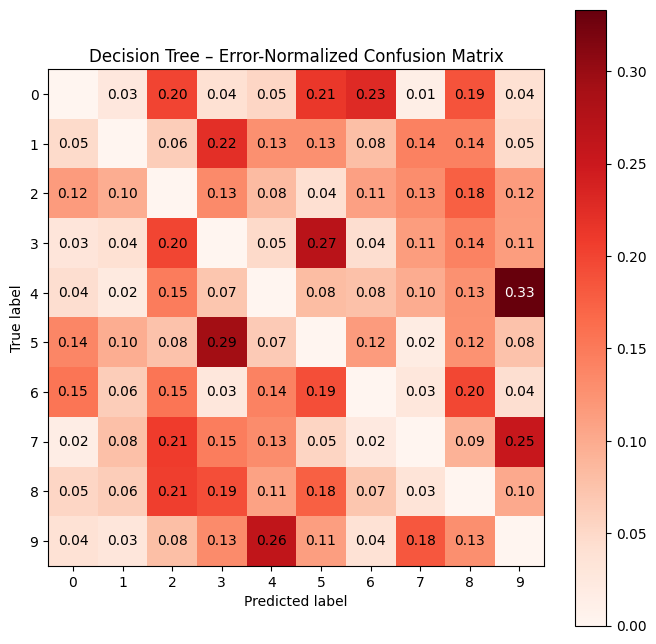

In [41]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_dt)

cm_errors = cm.copy()
np.fill_diagonal(cm_errors, 0)

row_sums = cm_errors.sum(axis=1, keepdims=True)
cm_error_normalized = np.divide(
    cm_errors,
    row_sums,
    where=row_sums != 0
)

plt.figure(figsize=(8, 8))
plt.imshow(cm_error_normalized, cmap="Reds")
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Decision Tree – Error-Normalized Confusion Matrix")

plt.xticks(range(10))
plt.yticks(range(10))

for i in range(10):
    for j in range(10):
        val = cm_error_normalized[i, j]
        if val > 0:
            plt.text(j, i, f"{val:.2f}",
                     ha="center", va="center",
                     color="white" if val > 0.3 else "black")

plt.show()
plt.show()

Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel.⁠

In [42]:
from scipy.ndimage import shift

def shift_image(image, dx, dy):
    """
    Shift an MNIST image by dx, dy pixels.
    dx: horizontal shift (+right, -left)
    dy: vertical shift (+down, -up)
    """
    image_2d = image.reshape(28, 28)
    shifted = shift(
        image_2d,
        shift=(dy, dx),
        mode="constant",
        cval=0
    )
    return shifted.reshape(784)

for each image in the training set, create four shifted copies (one per direction) and add them to the training set.

In [43]:
X_train_augmented = []
y_train_augmented = []

for image, label in zip(X_train, y_train):
    X_train_augmented.append(image)
    y_train_augmented.append(label)

    # Shift in 4 directions
    X_train_augmented.append(shift_image(image,  1,  0))  # right
    X_train_augmented.append(shift_image(image, -1,  0))  # left
    X_train_augmented.append(shift_image(image,  0,  1))  # down
    X_train_augmented.append(shift_image(image,  0, -1))  # up

    y_train_augmented.extend([label] * 4)

Convert to numpy array

In [44]:
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

print("Original training size:", X_train.shape)
print("Augmented training size:", X_train_augmented.shape)

Original training size: (56000, 784)
Augmented training size: (280000, 784)


Train model and test it

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_augmented, y_train_augmented)

print("Test accuracy:", rf.score(X_test, y_test))

Test accuracy: 0.9767857142857143


OvR SGD Classifier

In [46]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

ovr_sgd = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", OneVsRestClassifier(
        SGDClassifier(
            loss="log_loss",
            max_iter=1000,
            tol=1e-3,
            random_state=42
        )
    ))
])

ovr_sgd.fit(X_train, y_train)
y_pred_ovr = ovr_sgd.predict(X_test)

print("OvR Accuracy:", accuracy_score(y_test, y_pred_ovr))

OvR Accuracy: 0.9060714285714285


OvO Classifier

In [47]:
from sklearn.multiclass import OneVsOneClassifier

ovo_sgd = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", OneVsOneClassifier(
        SGDClassifier(
            loss="log_loss",
            max_iter=1000,
            tol=1e-3,
            random_state=42
        )
    ))
])

ovo_sgd.fit(X_train, y_train)
y_pred_ovo = ovo_sgd.predict(X_test)

print("OvO Accuracy:", accuracy_score(y_test, y_pred_ovo))

OvO Accuracy: 0.9213571428571429


Testing SGD with the augmented data

In [48]:
ovo_sgd.fit(X_train_augmented, y_train_augmented)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 OneVsOneClassifier(estimator=SGDClassifier(loss='log_loss',
                                                            random_state=42)))])

In [49]:
y_pred_ovo = ovo_sgd.predict(X_test)

print("OvO Accuracy on augmented data :", accuracy_score(y_test, y_pred_ovo))

OvO Accuracy: 0.9334285714285714
